In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns





Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000015E2A5D3A90>>
Traceback (most recent call last):
  File "C:\Users\Hp_D\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


#### Data Stats Intro

In [2]:
diabetes_dataset = pd.read_csv("../datasets/diabetes.csv")    #importing diabetes dataset into a variable | Dataframe | ../ = current repo (PREDICTIONS)

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.size   #size of dataset

6912

In [5]:
diabetes_dataset.shape  #shape of dataset | rows x columns

(768, 9)

In [6]:
diabetes_dataset.describe()   #statistics of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome']   # to access a particular column

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
diabetes_dataset['Outcome'].value_counts()    # count the number of diabetic and non diabetic patients

Outcome
0    500
1    268
Name: count, dtype: int64

***Data is imbalanced here, This can lead to biased models that perform well on the majority class but poorly on the minority class. Common techniques to handle imbalanced data include resampling (like SMOTE or undersampling)***

In [9]:
diabetes_dataset.groupby('Outcome').mean()   # Group the outcomes (0 | 1) of their respective mean values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Preprocessing of data

In [10]:
X = diabetes_dataset.drop(columns=['Outcome'], axis=1)   # Stored dataframe in X axis except 'outcomes' column
Y = diabetes_dataset['Outcome']   # Stored outcomes in Y axis 

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Splitting Data for Training and Testing

__the process of splitting a dataset into features (X) and target variable (Y). The data is then divided into training (80%) and testing (20%) subsets, with `X_train` and `y_train` used for training the model and `X_test` and `y_test` reserved for Testing its performance.__ 


In [13]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=111)  # Splitting Data

***here, `train_test_split(X,Y,test_size=0.2,random_state=111)`, dividing ecerything into X and Y, here size for testing datset is declared as 20% (test_size = 0.2), and "`random_state"` chose data to divide randomly and we assigne a value '111' to it so everytime we use the splitted data it'll be the same    |      and every divided value will be stored in `x_train, y_train, x_test, y_test` accordingly***

In [14]:
X_train.shape

(614, 8)

In [15]:
X_test.shape

(154, 8)

In [16]:
X_train.head()   #splitted data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
13,1,189,60,23,846,30.1,0.398,59
431,3,89,74,16,85,30.4,0.551,38
87,2,100,68,25,71,38.5,0.324,26
132,3,170,64,37,225,34.5,0.356,30
597,1,89,24,19,25,27.8,0.559,21


### -- Training on Imbalance data --
__When a model is trained on imbalanced data, it tends to favor the majority class, resulting in poor classification performance for the minority class. This can lead to high accuracy but low recall for the minority class, as the model is biased towards predicting the majority class__


# UnderSampling (Imbalance Data)

**`Objective : To get highest recall for "1"`**

__Undersampling is a technique where you reduce the number of instances from the majority class to balance the class distribution in an imbalanced dataset__

In [17]:
# Define the undersampler
undersampler = RandomUnderSampler(random_state=111)

# Apply undersampling
X_train_undersampled, Y_train_undersampled = undersampler.fit_resample(X_train, Y_train)  #Resampled features (`X_resampled`) and target labels (`Y_resampled`).

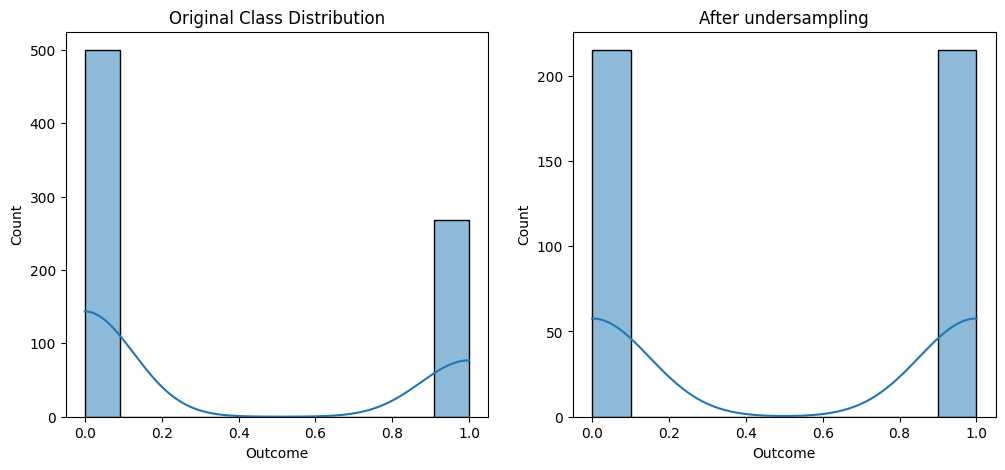

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(Y_train_undersampled, kde=True, ax=axes[1])
axes[1].set_title("After undersampling")

# Show the plots
plt.show()

## Without Tomek
**tomek is  highly imbalanced data so we'll not use tomek**

# Training of Model

###  SVM model (Undersampled)

In [19]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_undersampled, Y_train_undersampled)  # Retrain with the resampled data


SVC(kernel='linear')

***`model = svm.SVC(kernel='linear')` initializes a Support Vector Machine (SVM) classifier using the Support Vector Classifier (SVC) class from the sklearn.svm module in Python's scikit-learn library, here `(kernel='linear')` = linear line separates the classes***

In [20]:
y_pred = model.predict(X_test)   

***1. `model.predict()`: This method uses the trained model to make predictions on new data, `The predict()` function takes a set of input features (X_test) and produces the corresponding predictions (y_pred). 2. `X_test`:This is the test dataset, containing only input features (without the target labels). It is typically used to evaluate the model's performance on unseen data. 3.`y_pred`: This variable stores the predictions made by the model.***

In [21]:
print(accuracy_score(Y_test,y_pred))

0.7467532467532467


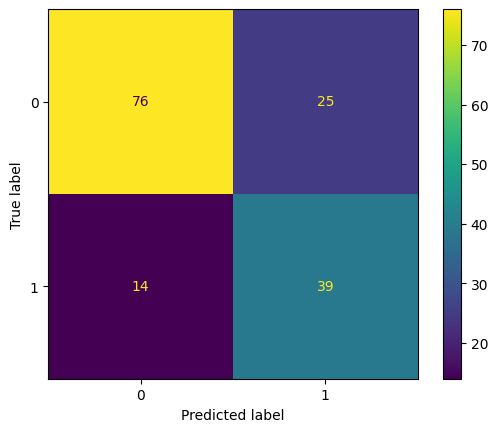

In [22]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

__`cm` is the confusion matrix, which is a 2x2 matrix that shows the true positives, true negatives,  false positives, and false negatives. The `disp.plot()` method generates a plot of this confusion matrix__

In [23]:
# Generate the classification report
report = classification_report(Y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.84      0.75      0.80       101
           1       0.61      0.74      0.67        53

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



***`Precision` is the ratio of true positive predictions to all predicted positives, reflecting the accuracy of positive predictions.***
***`Recall` is the ratio of true positive predictions to all actual positives, showing the model's ability to identify positives.***
***`F1-score` balances precision and recall, providing a single measure when you need to balance both.***
***`Support` indicates the number of actual instances for each class, showing the size of each class in the dataset.***

### Logistic Regression (UnderSampled)

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_undersampled, Y_train_undersampled)

y_pred = model.predict(X_test)

In [25]:
print(accuracy_score(Y_test,y_pred))

0.7272727272727273


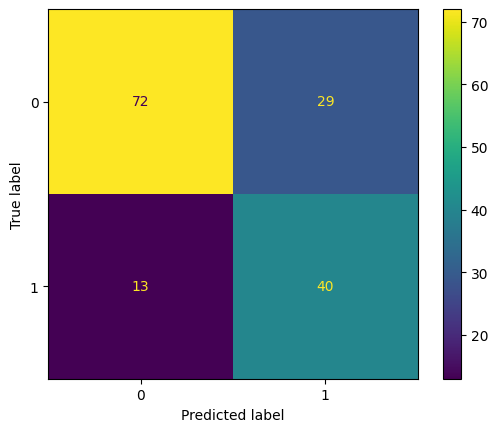

In [26]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
# Generate the classification report
report = classification_report(Y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       101
           1       0.58      0.75      0.66        53

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.73      0.73       154



### Random Forest (UnderSampled)

In [28]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=111)

# Train the model
model.fit(X_train_undersampled, Y_train_undersampled)

RandomForestClassifier(random_state=111)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

0.7012987012987013
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       101
           1       0.55      0.77      0.64        53

    accuracy                           0.70       154
   macro avg       0.70      0.72      0.69       154
weighted avg       0.74      0.70      0.71       154



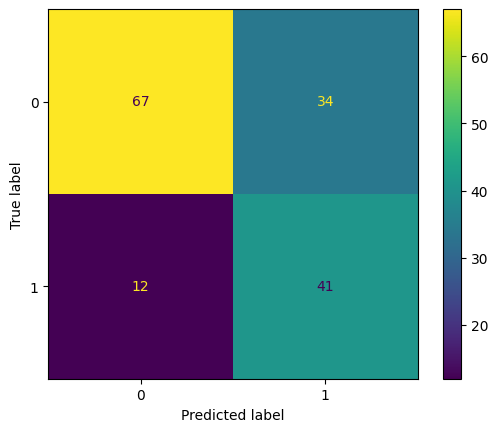

In [30]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(accuracy_score(Y_test,y_pred))
report = classification_report(Y_test, y_pred)
print(report)

## Tomek Link 
__Tomek Links is a data cleaning technique that removes borderline examples, improving the decision boundary by eliminating instances from the majority class that are closest to the minority class__

In [1]:
tomek_links = TomekLinks()
X_resampled, Y_resampled = tomek_links.fit_resample(X_train, Y_train) 

NameError: name 'TomekLinks' is not defined

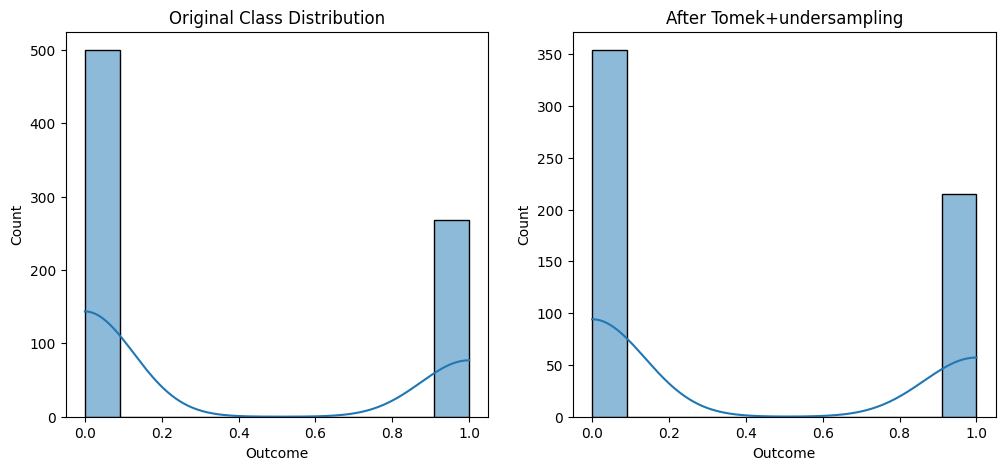

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(Y_resampled, kde=True, ax=axes[1])
axes[1].set_title("After Tomek+undersampling")

# Show the plots
plt.show()

# OverSampling 

__OverSampling Data__

In [33]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Oversample minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train) # Oversampling undersampled Data

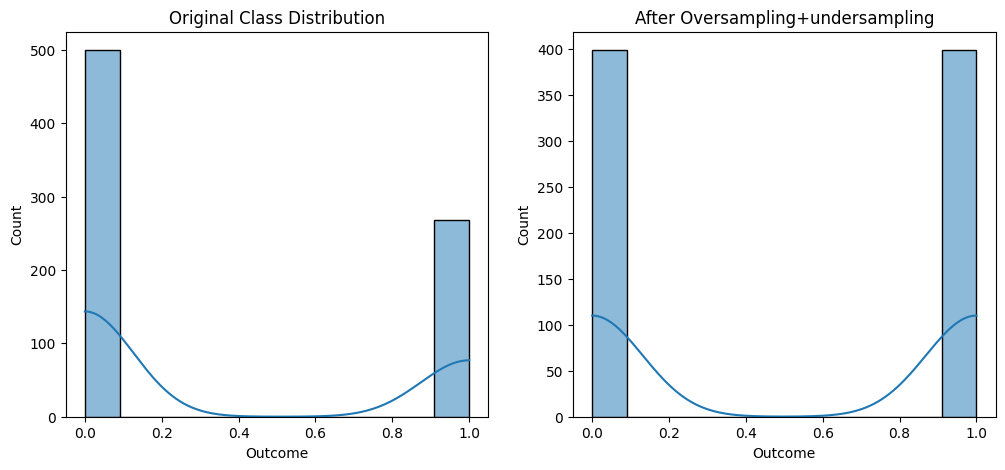

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(y_train_smote, kde=True, ax=axes[1])
axes[1].set_title("After Oversampling+undersampling")

# Show the plots
plt.show()

### Random Forest (Oversampled) 

In [35]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)


report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.79      0.76      0.78       101
           1       0.58      0.62      0.60        53

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



### Logistic Regression (Oversampled)

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       101
           1       0.58      0.70      0.63        53

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.72      0.73       154



### SVM (OverSampled)

In [37]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_smote, y_train_smote)  # Retrain with the resampled data

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       101
           1       0.60      0.70      0.64        53

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



## Final Model ✅

### SVM (Undersampled) ✅
**Choose SVM with undersampling because it achieves the highest recall (0.74) for diabetic cases, reducing the risk of missing actual patients while maintaining balanced performance**

In [38]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_undersampled, Y_train_undersampled)  # Retrain with the resampled data

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.84      0.75      0.80       101
           1       0.61      0.74      0.67        53

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [39]:
import pickle   # pickle serialize or desiralize python objects and save them in file
filename = "diabetes_model.sav"  # .sav is used for saving models
pickle.dump(model, open(filename, 'wb'))   # open(filename, 'wb') opens the file in write-binary mode (wb). This mode allows the byte stream generated by pickle.dump() to be written to the file
